In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data/aug_train.csv')

In [3]:
data = data.rename(columns={'enrollee_id': 'id', 'target': 'target'})

In [4]:
data.shape

(19158, 14)

#### not a large dataset 

In [5]:
data.dtypes

id                          int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
dtype: object

In [16]:
data.isna().sum() / data.shape[0]

id                        0.000000
city                      0.000000
city_development_index    0.000000
gender                    0.235306
relevent_experience       0.000000
enrolled_university       0.020148
education_level           0.024011
major_discipline          0.146832
experience                0.003393
company_size              0.309949
company_type              0.320493
last_new_job              0.022080
training_hours            0.000000
target                    0.000000
dtype: float64

In [28]:
data.target.value_counts(normalize=True)

0.0    0.750652
1.0    0.249348
Name: target, dtype: float64

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,19158.0,16875.358179,9616.292592,1.000,8554.25,16982.500,25169.75,33380.000
city_development_index,19158.0,0.828848,0.123362,0.448,0.74,0.903,0.92,0.949
training_hours,19158.0,65.366896,60.058462,1.000,23.00,47.000,88.00,336.000
target,19158.0,0.249348,0.432647,0.000,0.00,0.000,0.00,1.000


# Univariate analysis

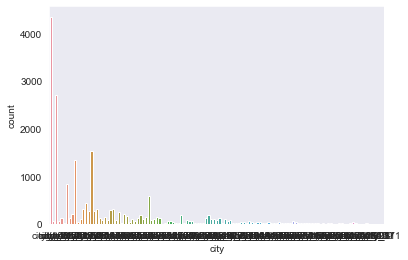

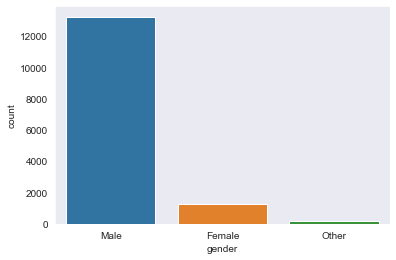

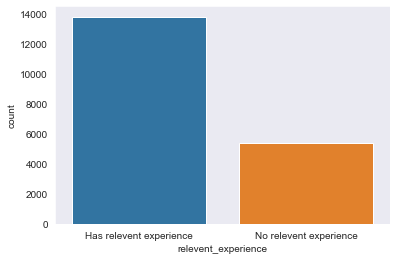

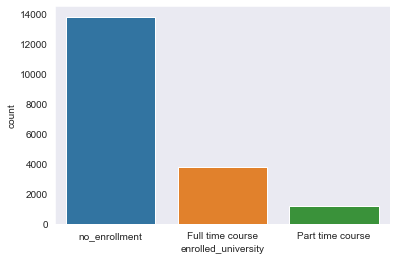

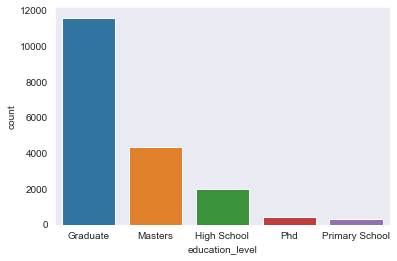

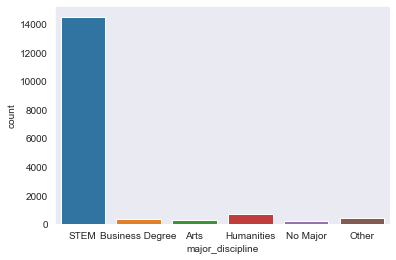

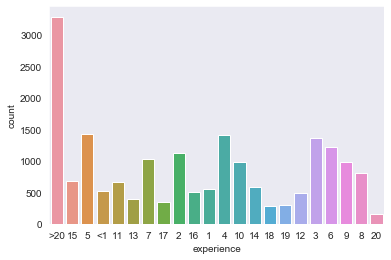

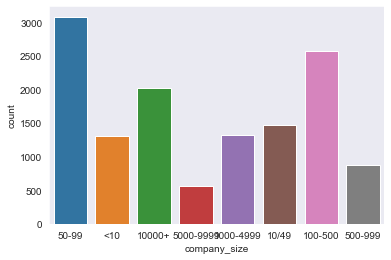

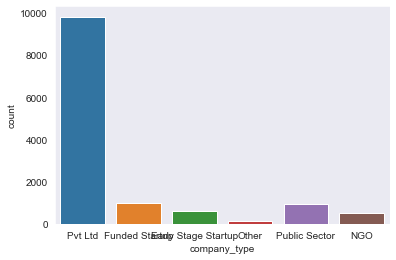

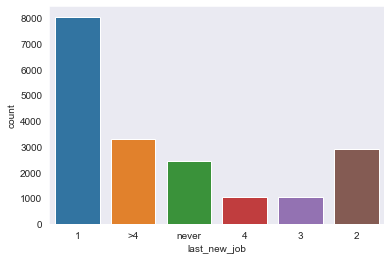

In [8]:
# plot distributions of each categorical column in data
sns.set_style("dark")
for col in data.select_dtypes(include='object'):
    plt.figure()
    sns.countplot(data[col])

In [26]:
data.groupby(['enrolled_university', 'education_level']).count()

id  city  city_development_index  \
enrolled_university education_level                                       
Full time course    Graduate         2209  2209                    2209   
                    High School       864   864                     864   
                    Masters           557   557                     557   
                    Phd                25    25                      25   
                    Primary School     33    33                      33   
Part time course    Graduate          784   784                     784   
                    High School       166   166                     166   
                    Masters           204   204                     204   
                    Phd                12    12                      12   
                    Primary School     11    11                      11   
no_enrollment       Graduate         8434  8434                    8434   
                    High School       940   940                     940   
                    Masters          3547  3547                    3547   
                    Phd               371   371                     371   
                    Primary School    255   255                     255   

                                     gender  relevent_experience  \
enrolled_university education_level                                
Full time course    Graduate           1501                 2209   
                    High School         644                  864   
                    Masters             366                  557   
                    Phd                  15                   25   
                    Primary School       19                   33   
Part time course    Graduate            593                  784   
                    High School         123                  166   
                    Masters             135                  204   
                    Phd                   9                   12   
                    Primary School        6                   11   
no_enrollment       Graduate           6835                 8434   
                    High School         701                  940   
                    Masters            2793                 3547   
                    Phd                 303                  371   
                    Primary School      182                  255   

                                     major_discipline  experience  \
enrolled_university education_level                                 
Full time course    Graduate                     2200        2195   
                    High School                     0         864   
                    Masters                       556         556   
                    Phd                            25          24   
                    Primary School                  0          32   
Part time course    Graduate                      784         784   
                    High School                     0         165   
                    Masters                       203         204   
                    Phd                            12          12   
                    Primary School                  0          11   
no_enrollment       Graduate                     8422        8418   
                    High School                     0         938   
                    Masters                      3543        3533   
                    Phd                           371         369   
                    Primary School                  0         255   

                                     company_size  company_type  last_new_job  \
enrolled_university education_level                                             
Full time course    Graduate                 1040          1073          2107   
                    High School               252           281           833   
                    Masters                   328           345           534   
                    Phd    

### Notes about data 
city should be dropped in favor of city index <br>
A lot of numerical data has been binned ordinally <br> 
many cat features are skewed, so might drop some <br>
Idea for education level: change to boolean "is_postgrad" (actually ordinal works since using trees) <br>
gender seems skewed to male so we should just remove <br>
enrolled_university is way too inconsistent vs education_level (Future: Maybe consider turning this into "currently_studying"?) <br>
drop major discipline since everyone seems to be stem <br>
drop company_type because skewed

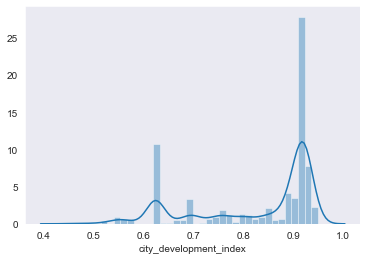

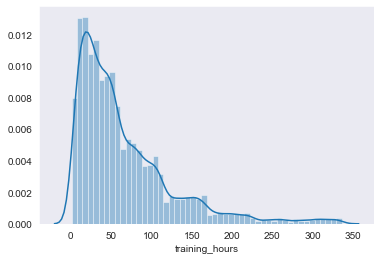

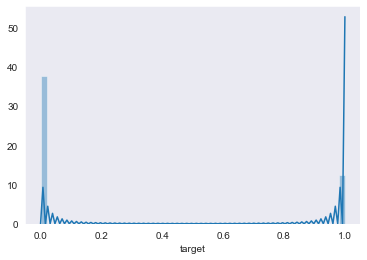

In [9]:
# plot distributions of each numerical column in data
for col in data.drop('id', axis=1).select_dtypes(include=np.number):
    plt.figure()
    sns.distplot(data[col])

# Compare Target Vs. Features 

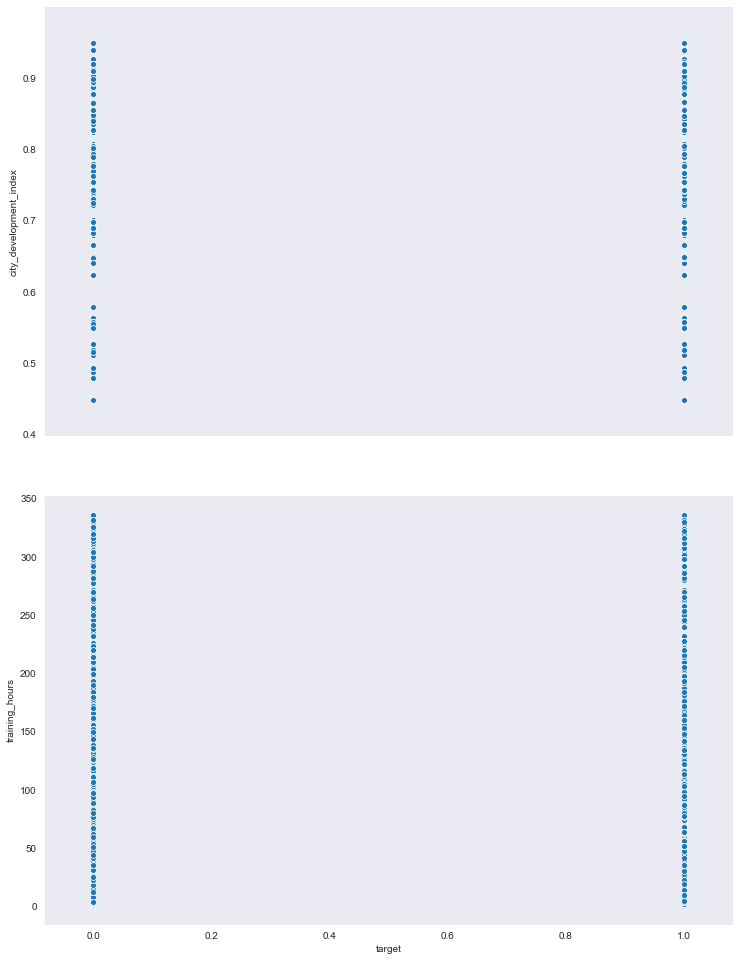

In [18]:
g = sns.pairplot(data.drop('id', axis=1).select_dtypes(include=np.number), y_vars=data.drop(['id', 'target'], axis=1).select_dtypes(include=np.number).columns.tolist(), x_vars=['target'])
g.fig.set_size_inches(15,15)

### Heatmap of Correlation between Numerical Columns

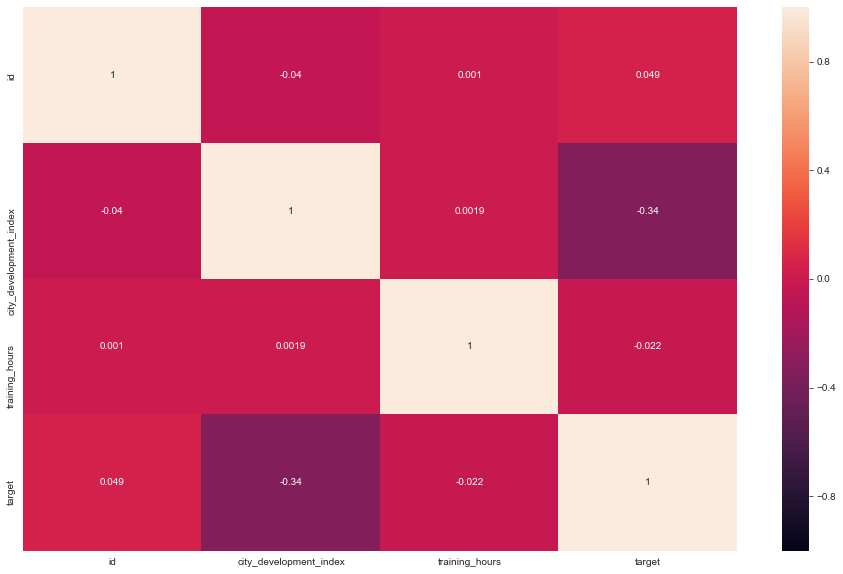

In [11]:
plt.figure(figsize=(16, 10))
sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)

### Plot Categorical vs Target 

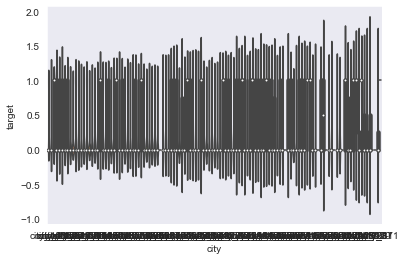

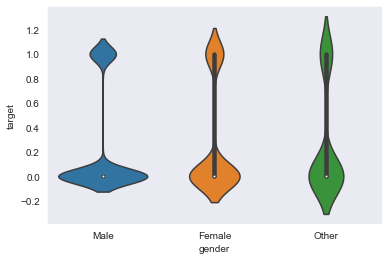

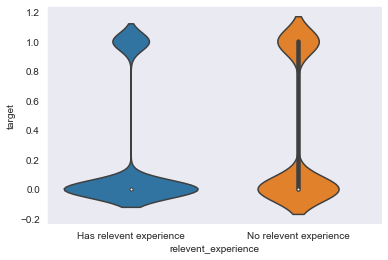

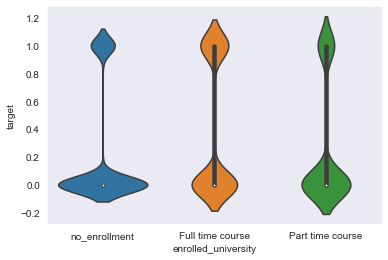

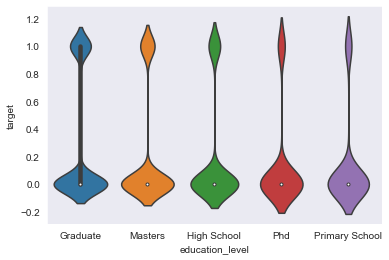

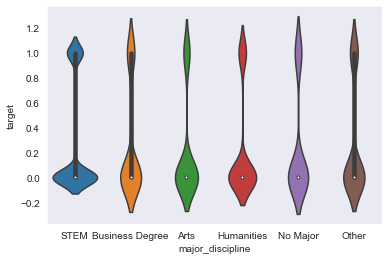

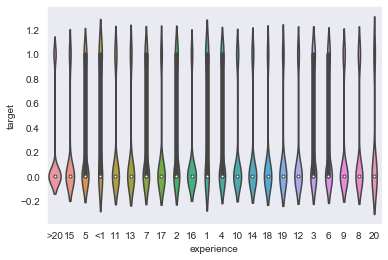

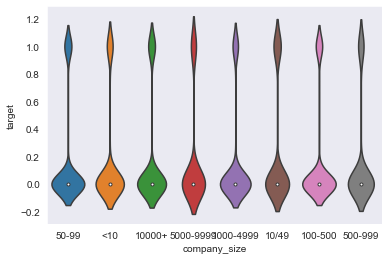

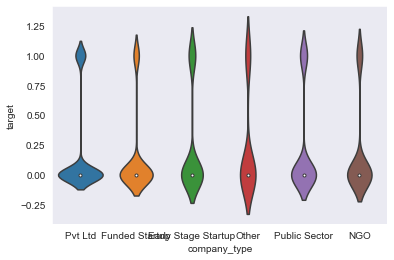

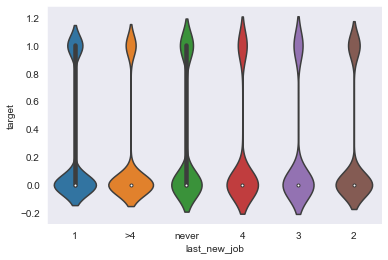

In [12]:
for col in data.select_dtypes(include='object'):
    plt.figure()
    sns.violinplot(data=data, x=col, y='target')